In [36]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
mars_map = np.load('mars_map.npy')
nr, nc = mars_map.shape


In [37]:
mars_map

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], shape=(1815, 756))

In [6]:
print(nr, nc)

1815 756


/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_61562/3300437665.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


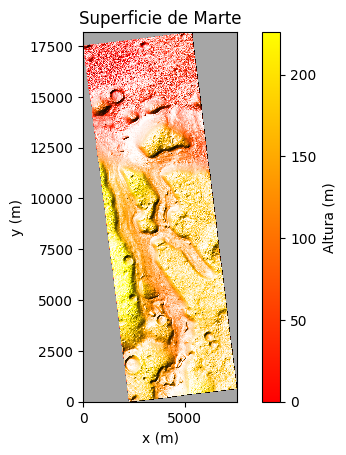

In [38]:
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
scale=10.0174
ls = LightSource(315, 45)
rgb = ls.shade(mars_map, cmap=cmap, vmin = 0, vmax = mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = mars_map.max(), 
                extent =[0, scale*nc, 0, scale*nr], 
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.show()


In [39]:
def cyr(matriz,x,y,scale):
    nr,nc=matriz.shape
    r=nr-round(y/scale)
    c=round(x/scale)
    return r,c


In [ ]:
r, c = cyr(mars_map, 2850, 6400, scale)

if 0 <= r < mars_map.shape[0] and 0 <= c < mars_map.shape[1]:
    print(f"Altura en el punto ({r}, {c}): {mars_map[r, c]}")
else:
    print(f"Error: Índice ({r}, {c}) fuera de los límites de la matriz.")


Altura en el punto (1176, 285): 145.52597656250015


In [ ]:
def diferencia_altura(matriz, nodo1, nodo2):
    r1, c1 = nodo1
    r2, c2 = nodo2
    # Esto lo ponemos para checar que los índices no estén fuera de la matriz
    if not (0 <= r1 < matriz.shape[0] and 0 <= c1 < matriz.shape[1]):
        return False
    if not (0 <= r2 < matriz.shape[0] and 0 <= c2 < matriz.shape[1]):
        return False
    altura1 = matriz[r1, c1]
    altura2 = matriz[r2, c2]
     # checa  si alguna altura es -1  que no se puede estar en ese terreno y devuelve false
    if altura1 == -1 or altura2 == -1:
        return False
    distancia = np.abs(altura1 - altura2)
    return distancia < 0.25

In [42]:
nodo1=(5001,5001)
nodo2=(5000,5000)
print(diferencia_altura(mars_map,nodo1,nodo2))

False


In [43]:
def obtener_vecinos(matriz, nodo):
    vecinos = []
    acciones = [(-1, 0), (1, 0), (0, -1), (0, 1),(1,1),(-1,1),(1,-1),(-1,-1)]  
    r, c = matriz.shape
    x, y = nodo
    for dx, dy in acciones:
        nx, ny = x + dx, y + dy
        if  diferencia_altura(matriz,nodo,(nx,ny)):  
            vecinos.append((nx, ny))
    return vecinos

In [45]:
nodo1=(5000,5000)
print(obtener_vecinos(mars_map,nodo1))

[]


In [ ]:
from collections import deque
# Usamos deque por que es mas rapido que listas y set  y pop.left es mas eficeinte que pop(0) 
def bfs(matriz, origen, objetivo):
    frontera = deque([origen])
    explorados = set()
    padres = {origen: None}

    while frontera:
        inicio = frontera.popleft()

        if inicio == objetivo:
            break  
        explorados.add(inicio)
        for vecino in obtener_vecinos(matriz, inicio): 
            if vecino not in explorados and vecino not in frontera:
                frontera.append(vecino)
                padres[vecino] = inicio 


    if objetivo not in padres:
        return []

 
    camino = []
    paso = objetivo
    while paso is not None:
        camino.append(paso)
        paso = padres[paso]

    camino.reverse()  
    return camino


 


In [59]:
scale = 10.0174  

origen = (2850, 6400)
destino = (3150, 6800)


r_origen, c_origen = cyr(mars_map, origen[0], origen[1], scale)
r_destino, c_destino = cyr(mars_map, destino[0], destino[1], scale)

if (0 <= r_origen < nr and 0 <= c_origen < nc) and (0 <= r_destino < nr and 0 <= c_destino < nc):
    print(f"Altura en el origen: {mars_map[r_origen, c_origen]}")
    print(f"Altura en el destino: {mars_map[r_destino, c_destino]}")


    camino_bfs = bfs(mars_map, (r_origen, c_origen), (r_destino, c_destino))

    if len(camino_bfs) > 0:
        print(f"Longitud del camino encontrado con BFS: {len(camino_bfs)}")
        print(f"Camino encontrado: {camino_bfs}")
    else:
        print("No se encontró un camino válido con BFS.")
else:
    print("Error: Las coordenadas están fuera de los límites de la matriz.")


Altura en el origen: 145.52597656250015
Altura en el destino: 128.35510253906264
Longitud del camino encontrado con BFS: 309
Camino encontrado: [(1176, 285), (1175, 285), (1174, 285), (1173, 285), (1172, 285), (1171, 285), (1170, 284), (1169, 284), (1168, 284), (1167, 284), (1166, 284), (1165, 283), (1164, 283), (1163, 283), (1162, 283), (1161, 283), (1160, 283), (1159, 283), (1158, 283), (1157, 283), (1156, 283), (1155, 282), (1154, 282), (1153, 283), (1152, 283), (1151, 283), (1150, 283), (1149, 283), (1148, 283), (1147, 283), (1146, 282), (1145, 282), (1144, 281), (1143, 281), (1142, 280), (1141, 280), (1140, 280), (1139, 280), (1138, 280), (1137, 280), (1136, 280), (1135, 280), (1134, 280), (1133, 280), (1132, 280), (1131, 280), (1130, 280), (1129, 279), (1128, 278), (1127, 278), (1126, 279), (1125, 279), (1124, 279), (1123, 279), (1122, 279), (1121, 279), (1120, 279), (1119, 279), (1118, 279), (1117, 279), (1116, 279), (1115, 279), (1114, 279), (1113, 279), (1112, 279), (1111, 280

In [48]:
def dfs(matriz, origen, objetivo, limite_profundidad=5000):
    stack = [(origen, 0)] 
    explorados = set()  
    padres = {origen: None}  

    while stack:
        inicio, profundidad = stack.pop()

        if profundidad > limite_profundidad:
            continue

        if inicio == objetivo:
            break

        if inicio not in explorados:
            explorados.add(inicio)

            for vecino in obtener_vecinos(matriz, inicio):
                if vecino not in explorados and vecino not in [x[0] for x in stack]:
                    stack.append((vecino, profundidad + 1))
                    padres[vecino] = inicio

    if objetivo not in padres:
        return []

    camino = []
    paso = objetivo
    while paso is not None:
        camino.append(paso)
        paso = padres.get(paso, None)

    camino.reverse()
    return camino


scale = 10.0174
origen=(2850,6400)
destino=(3150,6800)
r_origen, c_origen = cyr(mars_map, origen[0], origen[1], scale)
r_destino, c_destino = cyr(mars_map, destino[0], destino[1], scale)

if (0 <= r_origen < nr and 0 <= c_origen < nc and 
    0 <= r_destino < nr and 0 <= c_destino < nc):

    print(f"Altura en el origen: {mars_map[r_origen, c_origen]}")
    print(f"Altura en el destino: {mars_map[r_destino, c_destino]}")

    camino_dfs = dfs(mars_map, (r_origen, c_origen), (r_destino, c_destino))

    if len(camino_dfs) > 0:
        print(f"Longitud del camino encontrado con DFS: {len(camino_dfs)}")
        print(f"Camino encontrado: {camino_dfs}")  
    else:
        print("No se encontró un camino válido con DFS.")
else:
    print("Error: Las coordenadas están fuera de los límites de la matriz.")


Altura en el origen: 145.52597656250015
Altura en el destino: 128.35510253906264
Longitud del camino encontrado con DFS: 4993
Camino encontrado: [(1176, 285), (1175, 286), (1174, 285), (1173, 284), (1172, 283), (1171, 282), (1170, 281), (1169, 280), (1168, 279), (1167, 280), (1166, 279), (1165, 278), (1164, 277), (1163, 276), (1164, 276), (1165, 277), (1166, 277), (1167, 278), (1168, 278), (1169, 278), (1170, 279), (1171, 279), (1172, 279), (1173, 280), (1174, 281), (1175, 282), (1176, 281), (1175, 280), (1174, 279), (1173, 278), (1172, 278), (1171, 278), (1170, 277), (1169, 276), (1168, 275), (1167, 275), (1166, 275), (1165, 274), (1166, 274), (1167, 274), (1168, 274), (1169, 274), (1170, 274), (1171, 275), (1172, 276), (1173, 277), (1174, 276), (1175, 276), (1176, 277), (1177, 278), (1177, 279), (1178, 280), (1179, 279), (1180, 278), (1181, 278), (1182, 278), (1183, 278), (1184, 278), (1185, 278), (1186, 278), (1187, 278), (1188, 278), (1187, 279), (1188, 279), (1189, 279), (1190, 27

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_61562/1386750971.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


NameError: name 'camino' is not defined

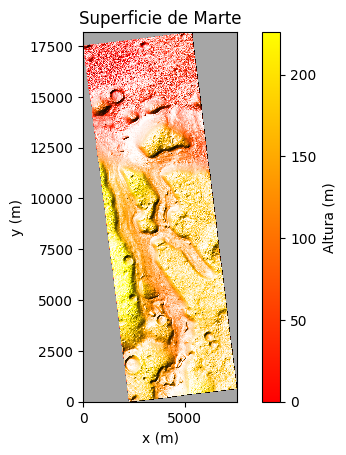

In [ ]:
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
scale=10.0174
ls = LightSource(315, 45)
rgb = ls.shade(mars_map, cmap=cmap, vmin = 0, vmax = mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = mars_map.max(), 
                extent =[0, scale*nc, 0, scale*nr], 
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.scatter([x[1] for x in camino], [x[0] for x in camino], color='blue', s=10)
plt.scatter(origen[1], origen[0], color='green', s=10)
plt.scatter(destino[1], destino[0], color='red', s=10)


plt.show()
